In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
df_out = pd.read_csv('Used_Bikes.csv')


In [8]:
# Shape , Missing values
print("Data shape is : ",data.shape)
data.isna().sum()

Data shape is :  (32648, 8)


bike_name     0
price         0
city          0
kms_driven    0
owner         0
age           0
power         0
brand         0
dtype: int64

In [4]:
## Correlation : High correlation between Power/Price
data.corr()

ValueError: could not convert string to float: 'TVS Star City Plus Dual Tone 110cc'

<Axes: xlabel='price'>

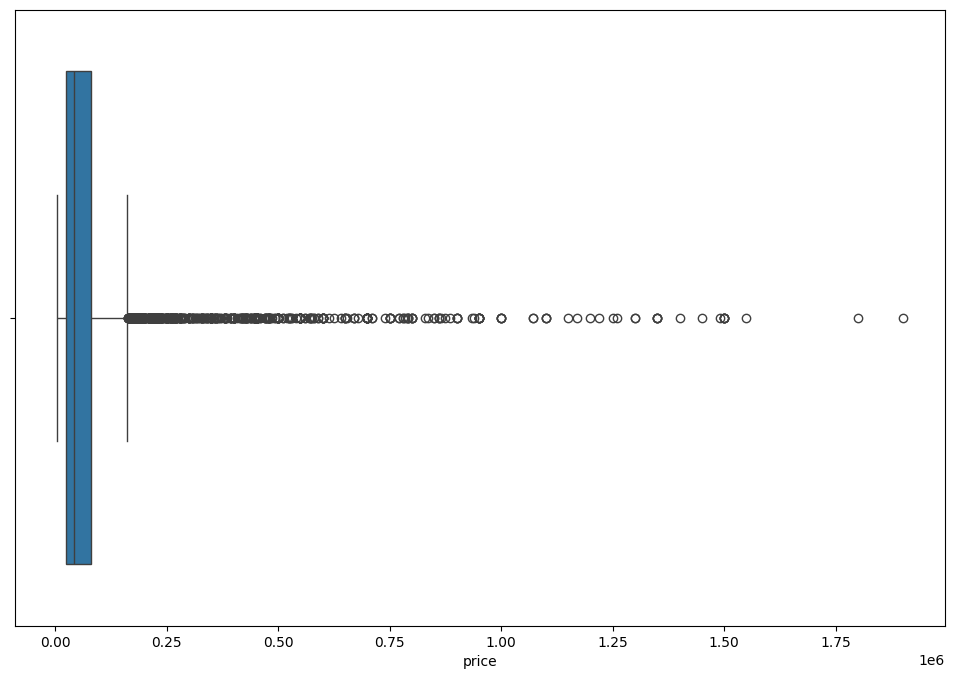

In [12]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'price' , data = data)

In [13]:
def get_iqr_values(df , column_name):
    median = df[column_name].mean()
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    maximum_quantile = q3 + (1.5*iqr)
    minimum_quantile = q1 - (1.5*iqr)
    return median , q1 , q3 , maximum_quantile , minimum_quantile

def remove_outliers(df,column_name):
    _,_,_,maximum,minimum = get_iqr_values(df,column_name)
    df_out = df[(df[column_name] > minimum) & (df[column_name] < maximum)]
    return df_out

In [14]:
df_out = remove_outliers(data,'price')
number_outliers = data.shape[0] - df_out.shape[0]
print('Number of outliers : ',number_outliers)

Number of outliers :  1941


In [15]:
df_out.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha
5,Yamaha FZs 150cc,53499.0,Delhi,25000.0,First Owner,6.0,150.0,Yamaha


In [5]:
categorical_features = ['bike_name' , 'city' , 'owner' , 'brand']
for col in categorical_features:
    print(col,'-->',df_out[col].nunique())


NameError: name 'df_out' is not defined

In [6]:
val_count_bike = df_out['bike_name'].value_counts()
condition_reduction = val_count_bike[val_count_bike>30]
df_out['bike_name'] = df_out['bike_name'].apply(lambda x : x if x in  condition_reduction else 'others' )

NameError: name 'df_out' is not defined

In [18]:
val_count_city = df_out['city'].value_counts()
cond_reduction = val_count_city[val_count_city>100]
df_out['city'] = df_out['city'].apply(lambda x : x if x in  cond_reduction else 'others' )

In [19]:
val_count_brand = df_out['brand'].value_counts()
cond_reduction_brand = val_count_brand[val_count_brand>500]
df_out['brand'] = df_out['brand'].apply(lambda x : x if x in  cond_reduction_brand else 'others' )

In [20]:
def owner_change(owner_type):
    if owner_type == 'First Owner':
        return 'Yes'
    else:
        return 'No'
df_out['owner'] = df_out['owner'].apply(lambda x : owner_change(x) )

In [21]:
df_out.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,others,35000.0,Ahmedabad,17654.0,Yes,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,Yes,4.0,350.0,Royal Enfield
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,Yes,4.0,180.0,TVS
4,others,80000.0,Bangalore,10000.0,Yes,3.0,150.0,Yamaha
5,Yamaha FZs 150cc,53499.0,Delhi,25000.0,Yes,6.0,150.0,Yamaha


In [22]:
df_out = pd.get_dummies(df_out , columns =['bike_name' , 'city' , 'owner' , 'brand'])
df_out.head()

,price,kms_driven,age,power,bike_name_Bajaj Avenger 220cc,bike_name_Bajaj Avenger Cruise 220,bike_name_Bajaj Avenger Street 150,bike_name_Bajaj Avenger Street 220,bike_name_Bajaj CT 100 100cc,bike_name_Bajaj Discover 100M,...,owner_No,owner_Yes,brand_Bajaj,brand_Hero,brand_Honda,brand_Royal Enfield,brand_Suzuki,brand_TVS,brand_Yamaha,brand_others
0,35000.0,17654.0,3.0,110.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1,119900.0,11000.0,4.0,350.0,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,65000.0,16329.0,4.0,180.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,80000.0,10000.0,3.0,150.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
5,53499.0,25000.0,6.0,150.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [ ]:
X = df_out.drop(['price'] , axis = 'columns')
y = df_out['price']

In [24]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
y_train = y_train.values
y_test = y_test.values

ValueError: could not convert string to float: 'Bajaj Pulsar 150cc'

In [20]:
## Models :
from sklearn.linear_model import LinearRegression ,Lasso
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor 
from sklearn.metrics import mean_absolute_error

In [21]:
def train_model(model):
    model.fit(X_train , y_train)
    preds = model.predict(X_test)
    loss = mean_absolute_error(y_test , preds)
    return loss

def DataFrame_loss(dict_of_models):
    loss_models = []
    for name , model in dict_of_models.items():
        loss = train_model(model)
        loss_models.append(loss)
    data = {'Models' : dict_of_models.keys(),'Loss' : loss_models}
    return pd.DataFrame(data = data)

In [14]:
models_dict = {'KNN' : KNeighborsRegressor() ,
               'Linear Regression' : LinearRegression(),
               'Lasso' : Lasso(), 
               'RandomForest' : RandomForestRegressor(),
               'AdaBoost' : AdaBoostRegressor(),
               'Xgboost' : XGBRegressor(),}
DataFrame_loss(models_dict)

ValueError: could not convert string to float: 'Bajaj Pulsar 150cc'

In [15]:
## ANN
from keras.models import Sequential
from keras.layers import Dense , Dropout

In [16]:
def build_model_regression(hidden_units1 , hidden_units2):
    model = Sequential()
    model.add(Dense(hidden_units1 , activation = "relu"))
    Dropout(0.2)
    model.add(Dense(hidden_units2 , activation = "relu"))
    Dropout(0.2)
    model.add(Dense(1, activation='linear'))
    return model

model = build_model_regression(64,64)

In [25]:
# loss function

model.compile(
    loss='mean_absolute_error', 
    optimizer='adam' ,
    metrics=['mae']
)
# train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    batch_size=64,
    validation_split=0.2
)

2021-10-20 09:41:08.439696: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
269/269 [==============================] - 2s 4ms/step - loss: 50557.1016 - mae: 50557.1016 - val_loss: 49968.7734 - val_mae: 49968.7734
Epoch 2/100
269/269 [==============================] - 1s 3ms/step - loss: 44818.4375 - mae: 44818.4375 - val_loss: 38391.5312 - val_mae: 38391.5312
Epoch 3/100
269/269 [==============================] - 1s 3ms/step - loss: 27624.7441 - mae: 27624.7441 - val_loss: 17856.7402 - val_mae: 17856.7402
Epoch 4/100
269/269 [==============================] - 1s 3ms/step - loss: 11950.3652 - mae: 11950.3652 - val_loss: 8791.7822 - val_mae: 8791.7822
Epoch 5/100
269/269 [==============================] - 1s 3ms/step - loss: 6807.0728 - mae: 6807.0728 - val_loss: 5515.2183 - val_mae: 5515.2183
Epoch 6/100
269/269 [==============================] - 1s 3ms/step - loss: 4768.3643 - mae: 4768.3643 - val_loss: 4218.3105 - val_mae: 4218.3105
Epoch 7/100
269/269 [==============================] - 1s 3ms/step - loss: 3929.0830 - mae: 3929.0830 - val_loss: 37

In [26]:
print(history.history.keys())
def plot_history(history , key_history):
    plt.figure(figsize = (12,8))
    plt.plot(history.history[key_history])
    plt.plot(history.history['val_'+key_history])
    plt.xlabel("Epochs")
    plt.ylabel(key_history)
    plt.legend([key_history , 'val_'+key_history])

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


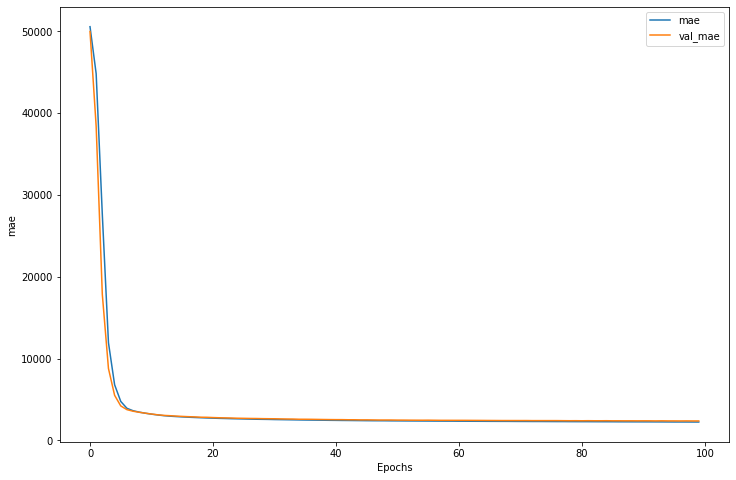

In [27]:
plot_history(history , 'mae')

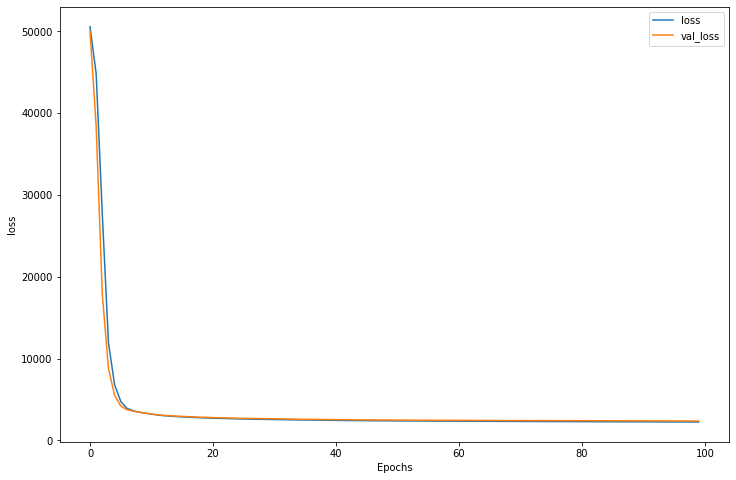

In [28]:
plot_history(history , 'loss')

<h1>Thank You !</h1>